In [2]:
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.patches as mpatches

In [184]:
# Summation of the value insde a dictionary
def dictsum(myDict):      
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
    return sum

In [185]:
#Overall Country list
Countries=['United States','Mexico','Japan','China','Korea,Rep.','Ireland','France','Italy','Czech Republic',
 'Austria',
 'Slovak Republic',
 'Slovenia',
 'Germany',
 'Portugal',
 'Hungary',
 'Colombia',
 'New Zealand',
 'Norway',
 'Latvia']

#Countries to highlight
Desired=['United States','New Zealand','Japan','China','Korea,Rep.','Ireland','France','Italy']

In [186]:
np.random.seed(0)
Value=np.random.rand(len(Countries))-0.5
df = pd.DataFrame({'Countries': Countries,'Value': Value,})
df.sort_values(['Value'],inplace=True)
df.set_index('Countries',drop=True,inplace=True)

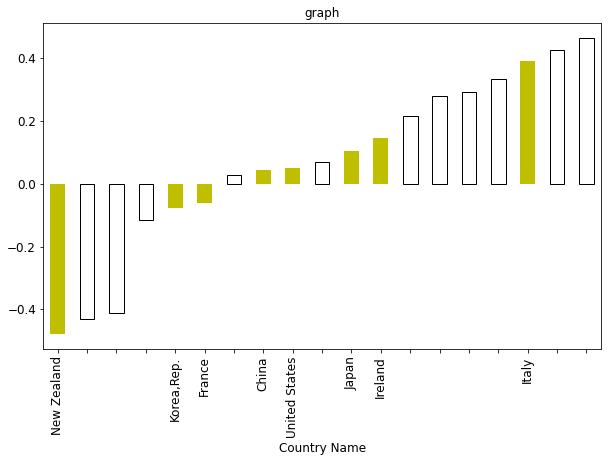

In [187]:
ax_1 = df['Value'].plot(kind='bar', title ="graph", figsize=(10, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=12)



for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in Desired:
        ticks.label1.set_visible(False)
        ax_1.patches[df.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[df.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('black')
    else:
        ax_1.patches[df.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('y')

ax_1.set_xlabel("Country Name", fontsize=12)
plt.show()

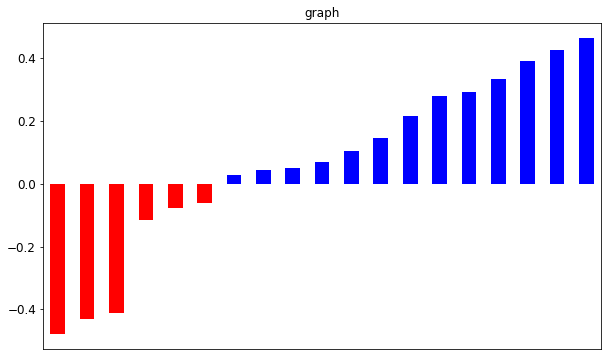

In [188]:
colors = ['red' if c < 0 else 'blue' for c in df['Value']]
ax_2 = df['Value'].plot(kind='bar', title ="graph", figsize=(10, 6), fontsize=12,color=colors)

x_axis = ax_2.axes.get_xaxis()
x_axis.set_visible(False)
plt.show()

## a = "The number of deaths in my country caused by consumption in other countries"
## b = "The number of deaths in other countries caused by my consumption"
## b - a = "net export of deaths"
## (b - a) / population = "net export of deaths / million population"

In [189]:
# We only care about the country sequence
file = open("C:/Users/15311/Desktop/comparison/Total_pop.json", "r")
population2 = file.read()
population2 = json.loads(population2)
Countries = list(population2.keys())
# population
file = open("C:/Users/15311/Desktop/comparison/Total_pop_new.json", "r")
population = file.read()
population = json.loads(population)
population = {k: population[k] for k in Countries}

In [190]:
population

{'AFG': 30567799.756560218,
 'ALB': 2895459.505805033,
 'DZA': 44142465.75369571,
 'AND': 108426.25682103666,
 'AGO': 36767764.83914875,
 'ATG': 98895.92659612204,
 'ARG': 45296274.32179148,
 'ARM': 2796981.6488053086,
 'ABW': 31020.02122089816,
 'AUS': 21481692.969437174,
 'AUT': 8910214.015179103,
 'AZE': 10021619.052216498,
 'BHS': 443856.022595522,
 'BHR': 2293788.406522696,
 'BGD': 164398299.65853384,
 'BRB': 290771.6378455447,
 'BLR': 9200523.059897505,
 'BEL': 11762124.423242152,
 'BLZ': 441489.9750487011,
 'BEN': 13087119.626750173,
 'BMU': 66846.18533539142,
 'BTN': 1127814.3458092513,
 'BOL': 11958459.874454644,
 'BIH': 3280253.3940957338,
 'BWA': 2328869.6852201307,
 'BRA': 217276419.4014073,
 'VGB': 90296.63786959347,
 'BRN': 470702.8486485294,
 'BGR': 7748474.110322319,
 'BFA': 22817887.22274652,
 'BDI': 11301644.91717482,
 'KHM': 19746552.595341418,
 'CMR': 28523807.77659907,
 'CAN': 37341553.20510497,
 'CPV': 546389.9238095387,
 'CYM': 76245.85893920258,
 'CAF': 5602344.

In [7]:
file = open("../2_Concentration_Factors/total_output.json", "r")
total_output = file.read()
total_output = json.loads(total_output)

file = open("../2_Concentration_Factors/final_demand.json", "r")
final_demand = file.read()
final_demand = json.loads(final_demand)

In [8]:
final_demand['USA']/(10**13)

0.0019592997213328262

In [9]:
# per million USD
# EORA is in 1000 USD
for i in total_output:
    total_output[i] = total_output[i] * 1000 
    final_demand[i] = final_demand[i] * 1000 

In [10]:
final_demand['USA']/(10**13)

1.9592997213328263

In [195]:
# total number of deaths caused by country i and happen in country j
file = open("con_mort_tol.json", "r")
con_mort_tol = file.read()
con_mort_tol = json.loads(con_mort_tol)

In [196]:
# total number of deaths caused by country i and happen in country j
file = open("pro_mort_tol.json", "r")
pro_mort_tol = file.read()
pro_mort_tol = json.loads(pro_mort_tol)

In [197]:
# Row sum: total deaths happen in that country
con_total = dict(pd.DataFrame(con_mort_tol).sum(axis = 1))
pro_total = dict(pd.DataFrame(pro_mort_tol).sum(axis = 1))

In [198]:
dictsum(pro_total)

3557084.0529358317

In [199]:
# Col sum: total deaths caused by that country
con_caused = dict(pd.DataFrame(con_mort_tol).sum(axis = 0))
pro_caused = dict(pd.DataFrame(pro_mort_tol).sum(axis = 0))

In [200]:
# total deaths happen in that country
con_dom_world = {}
for country in con_mort_tol:
    con_dom_world[country] = {}
    con_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_dom_world[country]['world'] = con_total[country]
    con_dom_world[country]['OtherPartofWorld'] = con_dom_world[country]['world'] - con_dom_world[country]['domestic']

In [201]:
# total deaths caused by that country
con_cause_dom_world = {}
for country in con_mort_tol:
    con_cause_dom_world[country] = {}
    con_cause_dom_world[country]['domestic'] = con_mort_tol[country][country]
    con_cause_dom_world[country]['world'] = con_caused[country]
    con_cause_dom_world[country]['OtherPartofWorld'] = con_cause_dom_world[country]['world'] - con_cause_dom_world[country]['domestic']

In [202]:
# net_export_death = {}

# for country in con_cause_dom_world:
#     if country != 'ROW':
#         net_export_val = (con_cause_dom_world[country]['OtherPartofWorld'] - con_dom_world[country]['OtherPartofWorld'])
#         if net_export_val < -100000:
#             net_export_death[country] = -100000
#         elif net_export_val > 100000:
#             net_export_death[country] = 100000
#         else:
#             net_export_death[country] = net_export_val

In [203]:
net_export_death = {}
export_of_death = {}
import_of_death = {}

for country in con_cause_dom_world:
    if country != 'ROW':
        net_export_death[country] = (con_cause_dom_world[country]['OtherPartofWorld'] - con_dom_world[country]['OtherPartofWorld'])
        export_of_death[country] = con_cause_dom_world[country]['OtherPartofWorld']# total deaths caused by that country
        import_of_death[country] = con_dom_world[country]['OtherPartofWorld']# total deaths happen in that country

In [204]:
print(sorted(con_total.items(), key=lambda item: item[1],reverse=True)[:6])
print(sorted(con_caused.items(), key=lambda item: item[1],reverse=True)[:5])

[('CHN', 1241848.475484423), ('IND', 576492.7342931574), ('IDN', 169699.42867745517), ('JPN', 106707.94366040881), ('BRA', 92051.51869995154), ('USA', 86781.66618595831)]
[('CHN', 1023410.8300149156), ('IND', 447292.39315022324), ('USA', 230725.6868888209), ('IDN', 157906.31059919845), ('JPN', 124004.26105568584)]


In [205]:
net_export_death['CHN']

-218437.64546950755

In [206]:
print(sorted(net_export_death.items(), key=lambda item: item[1],reverse=True))

[('USA', 143944.0207028626), ('SAU', 37645.48636511252), ('GBR', 27933.41157481333), ('TUR', 25674.210780855246), ('FRA', 25222.65662576353), ('DEU', 18592.731576065387), ('PAK', 17666.219223549415), ('JPN', 17296.31739527703), ('IRN', 15849.17811539777), ('CAN', 14839.72582534375), ('ARE', 14722.513309786957), ('VEN', 14588.784775201462), ('HKG', 12674.94909674861), ('KWT', 11256.12145584595), ('KOR', 9774.294000287364), ('AUS', 9077.552719108058), ('IRQ', 8037.762190584562), ('ESP', 7312.159377833046), ('SGP', 7011.221559213811), ('CHE', 6752.9475942522295), ('ITA', 6573.673536983486), ('SRB', 6104.41635685544), ('QAT', 6053.564845575848), ('UZB', 5240.532562348583), ('BEL', 5162.933906308028), ('NLD', 5098.183639042107), ('SWE', 4987.059895419185), ('ISR', 4819.170389787656), ('OMN', 4594.482062323394), ('IRL', 4153.314909785793), ('KAZ', 3980.870943360187), ('NOR', 3608.430529480001), ('AUT', 3297.0615887753866), ('TKM', 3193.3850884839944), ('DZA', 3023.9015870862363), ('MYS', 278

In [207]:
df.sort_values(['Value'],inplace=True)
df.set_index('Countries',drop=True,inplace=True)

KeyError: "None of ['Countries'] are in the columns"

In [208]:
Desired=['IND','IDN','CHN','USA','JPN']
# ['IND','BGD','VNM','UKR','ROU','SRB','VEN','JPN','CHN','USA']

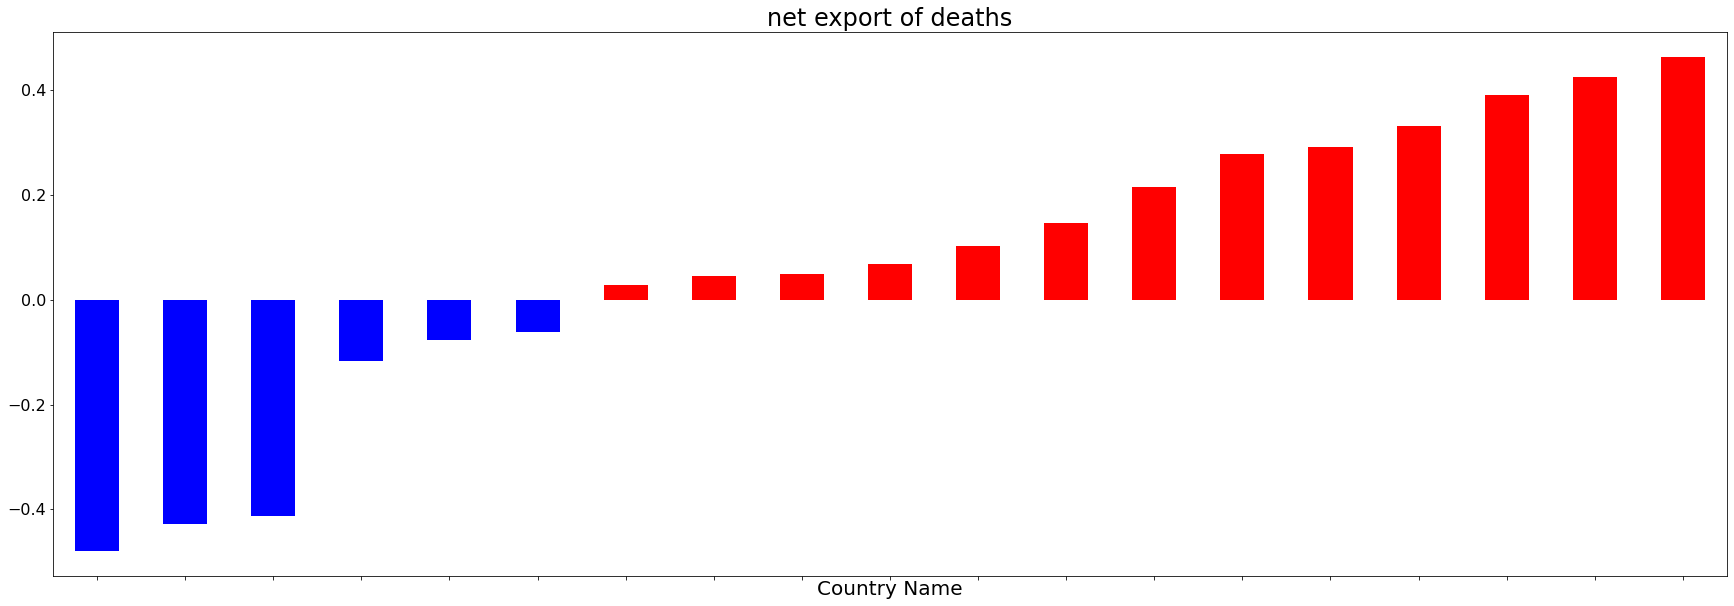

In [209]:
colors = ['blue' if c < 0 else 'red' for c in df['Value']]
ax_2 = df['Value'].plot(kind='bar', title ="net export of deaths", figsize=(30, 10), fontsize=16,color=colors)

ax_2.set_xlabel("Country Name", fontsize=20)
ax_2.set_title("net export of deaths",fontsize=24)
for ticks in ax_2.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in Desired:
        ticks.label1.set_visible(False)
    else:
        ax_2.patches[df.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('green')
        
# yticks = ['','<-100000','-75000','-50000','-25000','0','25000','50000','75000','>100000','']
# ax_2.set_yticklabels(yticks,fontsize=20)
# ax_2.xaxis.set_tick_params(labelsize=20)
plt.show()

---

In [210]:
net_export_death_per = {} # per population

for country in con_cause_dom_world:
    if country != 'ROW':
        net_export_val = (con_cause_dom_world[country]['OtherPartofWorld'] - con_dom_world[country]['OtherPartofWorld'])/(population[country]/10000)
        if net_export_val > 100:
            net_export_death_per[country] = 100
#         elif net_export_val > 100000:
#             net_export_death_per[country] = 100000
        else:
            net_export_death_per[country] = net_export_val

In [211]:
print(dict(sorted(net_export_death_per.items(), key=lambda item: item[1])))

{'BGR': -7.752440274365722, 'ROU': -4.8954014225404325, 'SWZ': -4.820687179076041, 'GEO': -4.616887202995718, 'PRK': -4.4184071325657985, 'MDA': -4.36155232761568, 'HUN': -3.9833598247761075, 'UKR': -3.077327135514589, 'ARM': -2.8331593744252523, 'AZE': -2.698357878728785, 'HTI': -2.5542089218211252, 'MKD': -2.3573542046996754, 'VNM': -2.222326015542579, 'BGD': -2.187095133630646, 'LSO': -2.01929676933702, 'JAM': -2.0161733497357703, 'HRV': -1.8706889605378365, 'GRC': -1.73521313019418, 'SLV': -1.658824196536766, 'CHN': -1.5120453818378816, 'SYR': -1.4822787346630868, 'KHM': -1.3118153987787227, 'NPL': -1.27803575651513, 'PSE': -1.2462917202085269, 'RUS': -0.9270209094220117, 'IND': -0.9166648243380784, 'THA': -0.8925062359955865, 'KGZ': -0.7616193845991975, 'AGO': -0.7249522769811191, 'TJK': -0.6742604586545742, 'ETH': -0.5943075789031143, 'PER': -0.5595987697655882, 'RWA': -0.5527300744692695, 'ECU': -0.5096312288771432, 'GTM': -0.4794730775310991, 'TWN': -0.47282159790854306, 'UGA':

In [212]:
Desired=['BGR','IND','IDN','CHN','USA','JPN','MCO']

In [213]:
df = pd.DataFrame({'Countries': list(net_export_death_per.keys()),'Value': list(net_export_death_per.values()),})
df.sort_values(['Value'],inplace=True)
df.set_index('Countries',drop=True,inplace=True)

C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


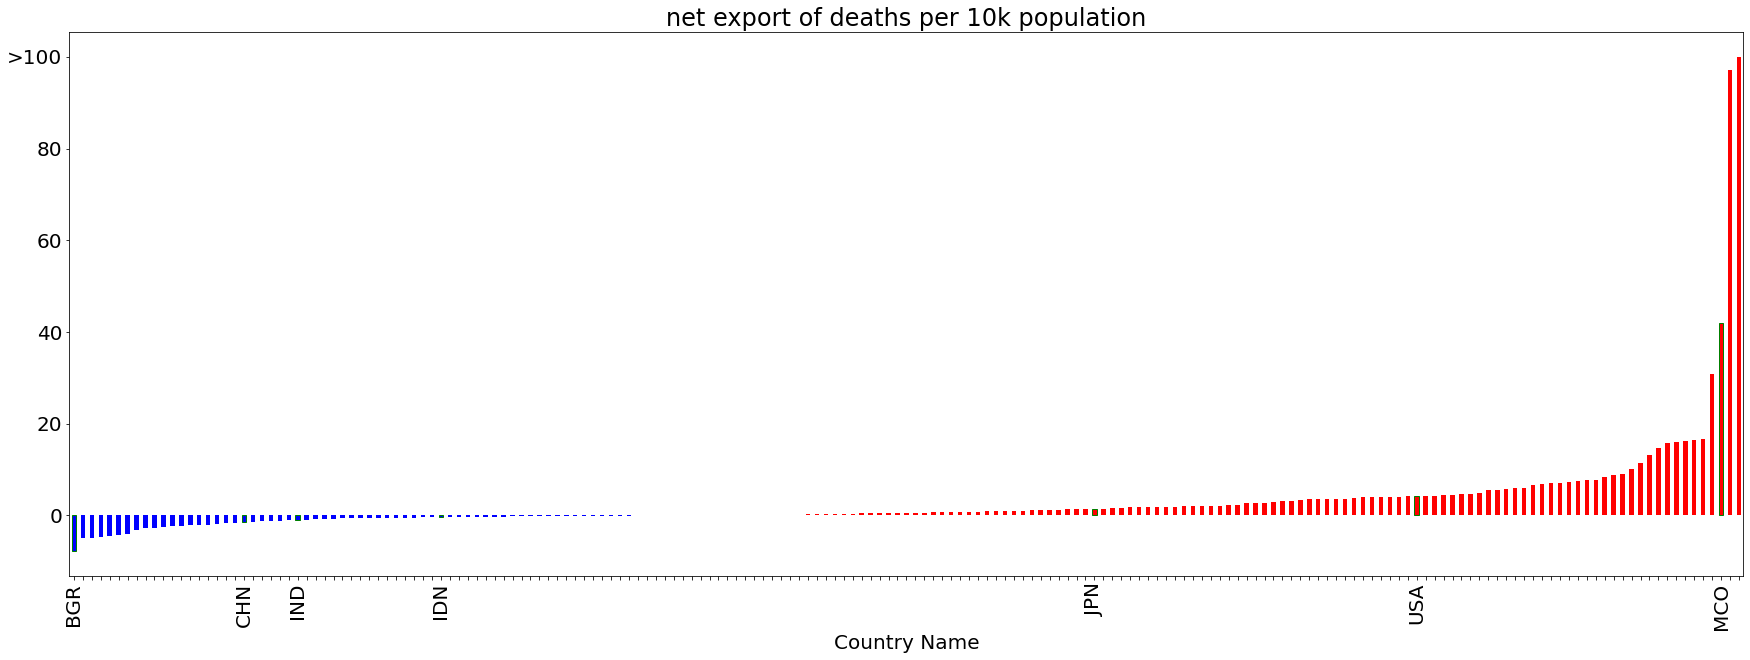

In [214]:
colors = ['blue' if c < 0 else 'red' for c in df['Value']]
ax_2 = df['Value'].plot(kind='bar', title ="net export of deaths per 10k population", figsize=(30, 10), fontsize=16,color=colors)

ax_2.set_xlabel("Country Name", fontsize=20)
ax_2.set_title("net export of deaths per 10k population",fontsize=24)
for ticks in ax_2.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in Desired:
        ticks.label1.set_visible(False)
    else:
        ax_2.patches[df.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('green')
        
yticks = ['','0','20','40','60','80','>100']
ax_2.set_yticklabels(yticks,fontsize=20)
ax_2.xaxis.set_tick_params(labelsize=20)
plt.show()

-----

# Bubble plot problem: values of "net export of deaths" are too 

In [215]:
population.pop('ROW')
final_demand.pop('ROW')

0.0

In [216]:
df_shp = gpd.read_file('C:/Users/15311/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

In [217]:
df_shp.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [218]:
list(net_export_death.keys())==list(import_of_death.keys())

True

In [219]:
df_new = pd.DataFrame({'ADM0_A3': list(net_export_death.keys()),'net_export': list(net_export_death.values()),
                      'population': list(population.values()),'final_demand': list(final_demand.values()),
                      'export_of_death': list(export_of_death.values()),'import_of_death': list(import_of_death.values())},)

In [220]:
df_final = pd.merge(df_new,df_shp,how="left",on=["ADM0_A3"])

In [221]:
df_final = df_final[['ADM0_A3','net_export','export_of_death','import_of_death','population','final_demand','CONTINENT']]

In [222]:
for i in range(len(df_final)):
    if df_final.loc[i,'ADM0_A3'] == 'PSE':
        df_final.loc[i,'CONTINENT'] == df_shp[df_shp['ADM0_A3']=='PSX']['CONTINENT']

In [223]:
df_final.loc[list(net_export_death.keys()).index('PSE'),'CONTINENT'] = df_shp[df_shp['ADM0_A3']=='PSX']['CONTINENT'].values[0]

In [224]:
df_final.loc[list(net_export_death.keys()).index('SUD'),'CONTINENT'] = df_shp[df_shp['ADM0_A3']=='SDN']['CONTINENT'].values[0]

In [225]:
df_final['CONTINENT']=pd.Categorical(df_final['CONTINENT'])

In [226]:
df_final['CONTINENT_code'] = df_final['CONTINENT'].cat.codes

In [227]:
df_final['CONTINENT_code'].unique()

array([1, 2, 0, 3, 6, 4, 5], dtype=int8)

In [228]:
continent = ['Africa','Asia','Europe','North America','Oceania','Seven seas (open ocean)','South America']

In [229]:
continent2 = {'0':'Africa','1':'Asia','2':'Europe','3':'North America','4':'Oceania','5':'Seven seas (open ocean)','6':'South America'}

1. Flip the x and y axis;
2. net export of lives per capita
3. change seven seas to other

In [230]:
df_final.to_csv('map_continent.csv')

## Choice 1

In [231]:
country_name = {'CHN':"China",'IND':'India','USA':'United States','BGD':'Bangladesh','RUS':'Russia','ROU':'Romania',
                'VNM':'Vietnam','UKR':'Ukraine','PRK':'North Korea','IRN':'Iran','PAK':'Pakistan','CAN':'Canada','VEN':'Venezuela',
                'JPN':'Japan','FRA':'France','GBR':'United Kingdom','TUR':'Turkey','SAU':'Saudi Arabia','IDN':'Indonesia',
                'BRA':'Brazil','NGA':'Nigeria','MDA':'Moldova','SOM':'Somalia','ETH':'Ethiopia','AUS':'Australia',
                'MEX':'Mexico','LIE':'Liechtenstein','NOR':'Norway','CAN':'Canada','COD':'DR Congo','GEO':'Georgia',
                'BGR':'Bulgaria','ISR':'Israel','CYP':'Cyprus','KOR':'South Korea','MDA':'Moldova','SOM':'Somalia',
                'LBY':'Libya'}

In [67]:
most_populated_countries = list(df_final.sort_values(by='net_export_capita')[140:150]['ADM0_A3'])
most_populated_countries

['AUT', 'FIN', 'LBY', 'NZL', 'USA', 'CAN', 'AND', 'MNG', 'GBR', 'AUS']

In [97]:
df_final_sort_pop[df_final_sort_pop['CONTINENT']=='Africa'].sort_values(by='net_export_capita')

,ADM0_A3,net_export,population,final_demand,CONTINENT,CONTINENT_code,demand_capita,net_export_capita
160,SWZ,-255.122998,1.077423e+06,3.963609e+06,Africa,0,3.678786,-2.367900e-04
95,LSO,-332.275527,1.654606e+06,2.620074e+06,Africa,0,1.583503,-2.008185e-04
4,AGO,-2439.895456,3.676776e+07,9.788361e+07,Africa,0,2.662213,-6.635964e-05
58,ETH,-6167.544441,1.043829e+08,1.984329e+07,Africa,0,0.190101,-5.908577e-05
141,RWA,-744.212484,1.370474e+07,9.801565e+06,Africa,0,0.715195,-5.430328e-05
173,UGA,-1947.656407,4.248779e+07,2.702781e+07,Africa,0,0.636131,-4.584038e-05
49,COD,-4848.442153,1.135084e+08,3.943622e+07,Africa,0,0.347430,-4.271441e-05
19,BEN,-479.502159,1.308712e+07,9.289753e+06,Africa,0,0.709839,-3.663924e-05
114,MAR,-1276.677701,3.621003e+07,1.093142e+08,Africa,0,3.018892,-3.525757e-05
36,CAF,-190.933902,5.602345e+06,1.861158e+06,Africa,0,0.332210,-3.408107e-05


Text(0.5, 0, 'log(Final demand per capita(million dollars))')

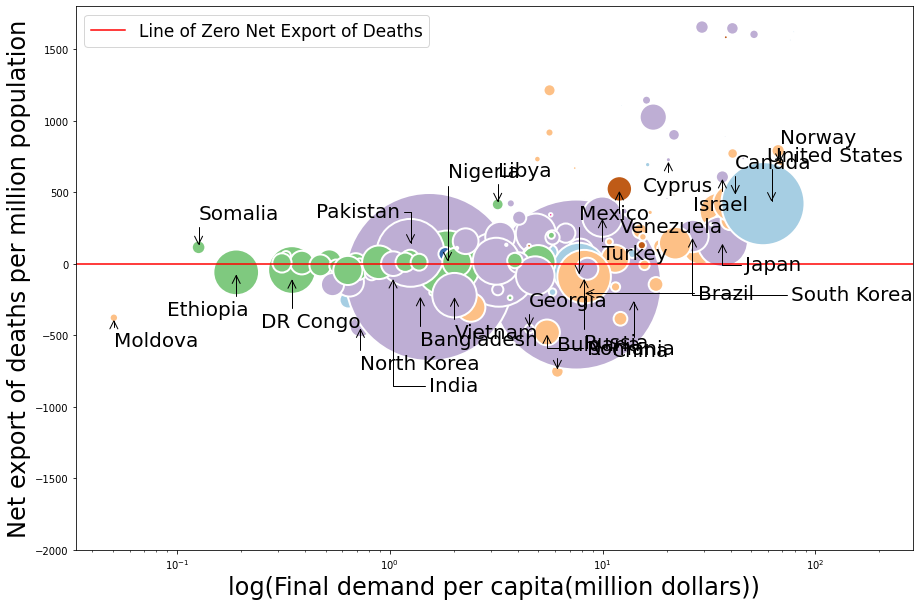

In [69]:
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_final['final_demand']/df_final['population'], 
    y = df_final['net_export']/(df_final['population']/1000000), 
    s=df_final['population']/50000, 
    c=df_final['CONTINENT'].cat.codes, 
    cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(-2000,1800)
# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")

plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
plt.legend(loc="upper left",fontsize=17)

   

# CHN
plt.annotate(country_name['CHN'],xy=(df_final[df_final['ADM0_A3']=='CHN']['final_demand'].values[0]/df_final[df_final['ADM0_A3']=='CHN']['population'].values[0]+6.5,
           (df_final[df_final['ADM0_A3']=='CHN']['net_export'].values[0]/(df_final[df_final['ADM0_A3']=='CHN']['population'].values[0]/1000000))-100),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']=='CHN']['final_demand'].values[0]/df_final[df_final['ADM0_A3']=='CHN']['population'].values[0]+3.5,
           (df_final[df_final['ADM0_A3']=='CHN']['net_export'].values[0]/(df_final[df_final['ADM0_A3']=='CHN']['population'].values[0]/1000000))-500),)
         
# USA
plt.annotate(country_name['USA'],xy=(df_final[df_final['ADM0_A3']=='USA']['final_demand'].values[0]/df_final[df_final['ADM0_A3']=='USA']['population'].values[0]+5.5,
           (df_final[df_final['ADM0_A3']=='USA']['net_export'].values[0]/(df_final[df_final['ADM0_A3']=='USA']['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']=='USA']['final_demand'].values[0]/df_final[df_final['ADM0_A3']=='USA']['population'].values[0]+2.5,
           (df_final[df_final['ADM0_A3']=='USA']['net_export'].values[0]/(df_final[df_final['ADM0_A3']=='USA']['population'].values[0]/1000000))+300),)
   
# IND
plt.annotate(country_name['IND'],xy=(df_final[df_final['ADM0_A3']=='IND']['final_demand'].values[0]/df_final[df_final['ADM0_A3']=='IND']['population'].values[0]-0.5,
           (df_final[df_final['ADM0_A3']=='IND']['net_export'].values[0]/(df_final[df_final['ADM0_A3']=='IND']['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']=='IND']['final_demand'].values[0]/df_final[df_final['ADM0_A3']=='IND']['population'].values[0],
           (df_final[df_final['ADM0_A3']=='IND']['net_export'].values[0]/(df_final[df_final['ADM0_A3']=='IND']['population'].values[0]/1000000))-800),)

# JPN
i = 'JPN'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]+10,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-200),)
# VNM
i = 'VNM'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-300),)
# BRA
i = 'BRA'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-150),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]+20,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-200),)
# TUR
i = 'TUR'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-300),)
# VEN
i = 'VEN'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-300),)
# PAK
i = 'PAK'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+50),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-0.8,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+250),)
# MEX
i = 'MEX'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-50),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+350),)
# RUS
i = 'RUS'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-500),)
# BGD
i = 'BGD'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-350),)
# NGA
i = 'NGA'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+600),)
# ROU
i = 'ROU'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]+3,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-150),)
# NOR
i = 'NOR'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+150),)
                      
# CAN
i = 'CAN'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+50),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+250),)
# COD
i = 'COD'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-50),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-0.1,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-400),)

# ETH
i = 'ETH'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-0.1,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-300),)
  
# GEO
i = 'GEO'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+160),)

# BGR
i = 'BGR'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+150),)
# PRK
i = 'PRK'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-300),)
 
# ISR
i = 'ISR'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-10,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-230),)
   
# CYP
i = 'CYP'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]-5,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-220),)
# KOR
i = 'KOR'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0]+50,
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-450),)
# MDA
i = 'MDA'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))-200),)
 

# SOM
i = 'SOM'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+200),)

# LBY
i = 'LBY'
plt.annotate(country_name[i],xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
             arrowprops = arrowprops,    
             xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
           (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))+200),)

# # LBY
# i = 'LBY'
# plt.annotate(i,xy=(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
#            (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),size=20,
#              arrowprops = arrowprops,    
#              xytext =(df_final[df_final['ADM0_A3']==i]['final_demand'].values[0]/df_final[df_final['ADM0_A3']==i]['population'].values[0],
#            (df_final[df_final['ADM0_A3']==i]['net_export'].values[0]/(df_final[df_final['ADM0_A3']==i]['population'].values[0]/1000000))),)
  
    
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(million dollars))",fontsize=24)
# plt.title("")

In [70]:
y_low = min(df_final['net_export']/(df_final['population']/1000000))
y_high = max(df_final['net_export']/(df_final['population']/1000000))
y_low, y_high

(-751.7412424092038, 11335.459777932749)

In [71]:
x_low = min(np.log10(df_final['final_demand']/df_final['population']))
x_high = max(np.log10(df_final['final_demand']/df_final['population']))
x_low, x_high

(-1.295769843251853, 2.279157138113827)

Text(0.5, 0, 'log(Final demand per capita(million dollars))')

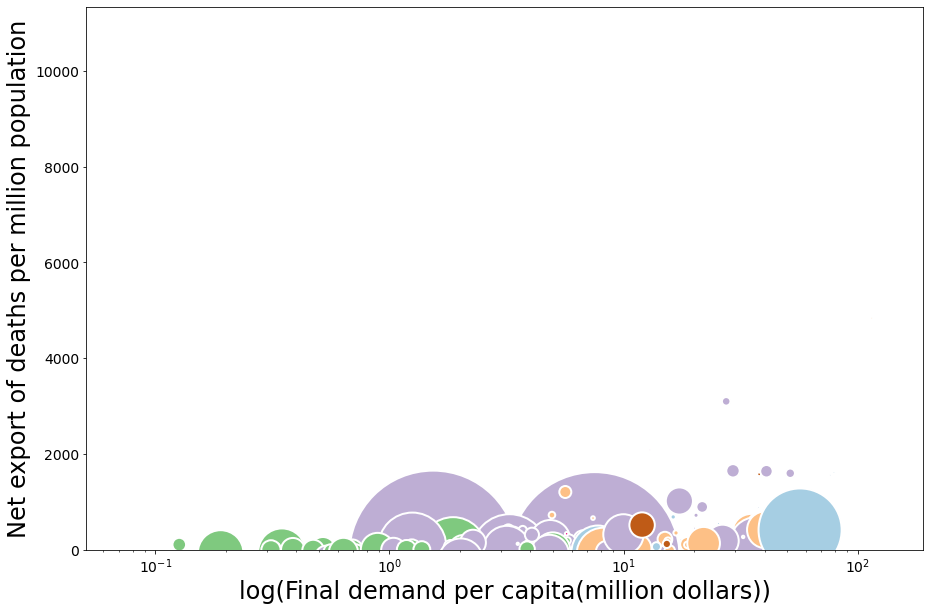

In [72]:
# the first
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_final['final_demand']/df_final['population'], 
    y = df_final['net_export']/(df_final['population']/1000000), 
    s=df_final['population']/50000, 
    c=df_final['CONTINENT'].cat.codes, 
    cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(0,y_high)
plt.xlim(10**x_low,10**x_high)
# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="upper left", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")

# plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
# plt.legend(loc="upper left",fontsize=17)

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(million dollars))",fontsize=24)
# plt.title("")

Text(0.5, 0, 'log(Final demand per capita(million dollars))')

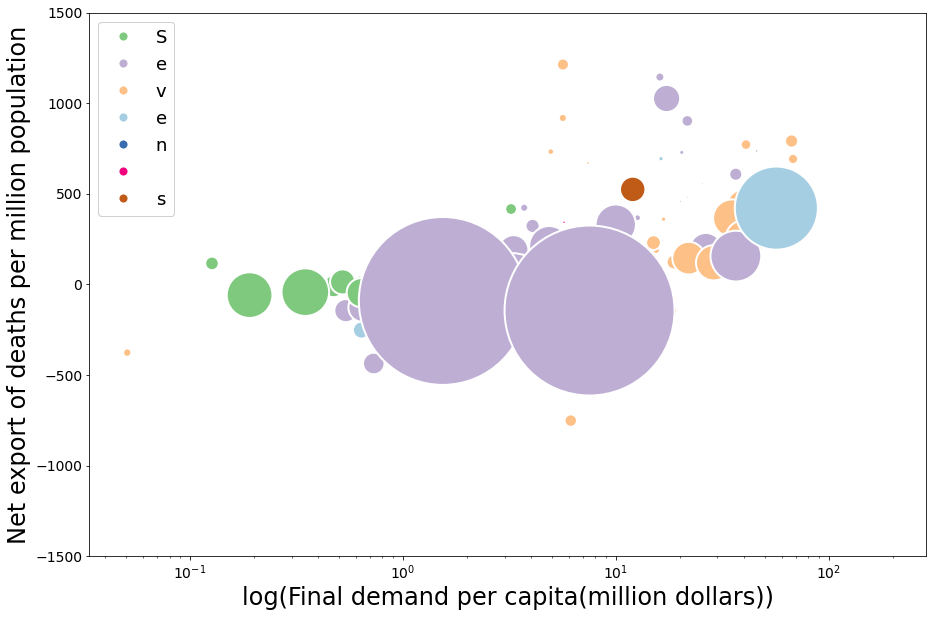

In [98]:
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    x = df_final_sort_pop['final_demand']/df_final_sort_pop['population'], 
    y = df_final_sort_pop['net_export']/(df_final_sort_pop['population']/1000000), 
    s=df_final_sort_pop['population']/50000, 
    c=df_final_sort_pop['CONTINENT'].cat.codes, 
    cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.ylim(-1500,1500)
# Add titles (main and on axis)
plt.xscale('log')
legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
                    loc="upper left", fontsize=18)
ax.add_artist(legend1)

# add labels to bubbles that are big enough
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 0")



matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
plt.ylabel("Net export of deaths per million population",fontsize=24)
plt.xlabel("log(Final demand per capita(million dollars))",fontsize=24)
# plt.title("")

## Write full name of each country

## Choice 2

In [75]:
most_populated_countries = list(df_final.sort_values(by='population')[-8:]['ADM0_A3'])
most_populated_countries.reverse()

In [76]:
most_populated_countries

['CHN', 'IND', 'USA', 'IDN', 'PAK', 'BRA', 'NGA', 'BGD']

In [99]:
df_final['demand_capita'] = df_final['final_demand']/df_final['population']
most_demand_capita = list(df_final_sort_pop.sort_values(by='demand_capita')[-3:]['ADM0_A3'])
least_demand_capita = list(df_final_sort_pop.sort_values(by='demand_capita')[:3]['ADM0_A3'])

In [100]:
list(df_final_sort_pop.sort_values(by='net_export_capita')[:3]['ADM0_A3'])

['BGR', 'ROU', 'GEO']

In [101]:
most_demand_capita+least_demand_capita

['MCO', 'SMR', 'LIE', 'MDA', 'SOM', 'ETH']

In [102]:
annotation_countries = most_populated_countries+least_demand_capita+['AUS','TUR','VEN','SAU','RUS','ROU','BGD','IRN','VNM','BRA','NGA','JPN']

In [103]:
df_final_sort_pop = df_final.sort_values(['population'])
df_final_sort_pop

,ADM0_A3,net_export,population,final_demand,CONTINENT,CONTINENT_code,demand_capita,net_export_capita,colors
143,SMR,72.358779,6.383400e+03,8.901227e+05,Europe,2,139.443345,0.011335,#fdc086
98,LIE,273.580861,2.582104e+04,4.910558e+06,Europe,2,190.176626,0.010595,#fdc086
8,ABW,50.320276,3.102002e+04,2.455685e+06,North America,3,79.164513,0.001622,#a6cee3
111,MCO,279.285748,5.770690e+04,6.628647e+06,Europe,2,114.867492,0.004840,#fdc086
69,GRL,34.451311,5.771365e+04,2.200414e+06,North America,3,38.126400,0.000597,#a6cee3
...,...,...,...,...,...,...,...,...,...
128,PAK,17760.819762,2.301336e+08,2.883035e+08,Asia,1,1.252766,0.000077,#beaed4
79,IDN,-10116.316469,2.843656e+08,9.268892e+08,Asia,1,3.259498,-0.000036,#beaed4
178,USA,145392.296191,3.453112e+08,1.959300e+10,North America,3,56.740119,0.000421,#a6cee3
78,IND,-128664.725327,1.409461e+09,2.166778e+09,Asia,1,1.537309,-0.000091,#beaed4


In [82]:
df_final_sort_pop[df_final_sort_pop['CONTINENT']=='Asia']

,ADM0_A3,net_export,population,final_demand,CONTINENT,CONTINENT_code,demand_capita,net_export_capita
27,BRN,215.668122,4.707028e+05,9.453402e+06,Asia,1,20.083588,0.000458
101,MAC,444.952871,6.041056e+05,2.766680e+07,Asia,1,45.797960,0.000737
21,BTN,147.377765,1.127814e+06,2.517614e+06,Asia,1,2.232295,0.000131
45,CYP,929.340442,1.276045e+06,2.602135e+07,Asia,1,20.392197,0.000728
13,BHR,843.880616,2.293788e+06,2.899051e+07,Asia,1,12.638702,0.000368
7,ARM,-783.742250,2.796982e+06,1.165155e+07,Asia,1,4.165757,-0.000280
112,MNG,1373.068848,3.245666e+06,1.203582e+07,Asia,1,3.708273,0.000423
90,KWT,11295.254475,3.639123e+06,9.981827e+07,Asia,1,27.429214,0.003104
65,GEO,-1736.454887,3.821296e+06,1.731476e+07,Asia,1,4.531122,-0.000454
127,OMN,4615.402804,4.033494e+06,6.492683e+07,Asia,1,16.096919,0.001144


In [83]:
country_name = {'CHN':"China",'IND':'India','USA':'United States','BGD':'Bangladesh','RUS':'Russia','ROU':'Romania',
                'VNM':'Vietnam','UKR':'Ukraine','PRK':'North Korea','IRN':'Iran','PAK':'Pakistan','CAN':'Canada','VEN':'Venezuela',
                'JPN':'Japan','FRA':'France','GBR':'United Kingdom','TUR':'Turkey','SAU':'Saudi Arabia','IDN':'Indonesia',
                'BRA':'Brazil','NGA':'Nigeria','MDA':'Moldova','SOM':'Somalia','ETH':'Ethiopia','AUS':'Australia'}

NameError: name 'annotation_countries' is not defined

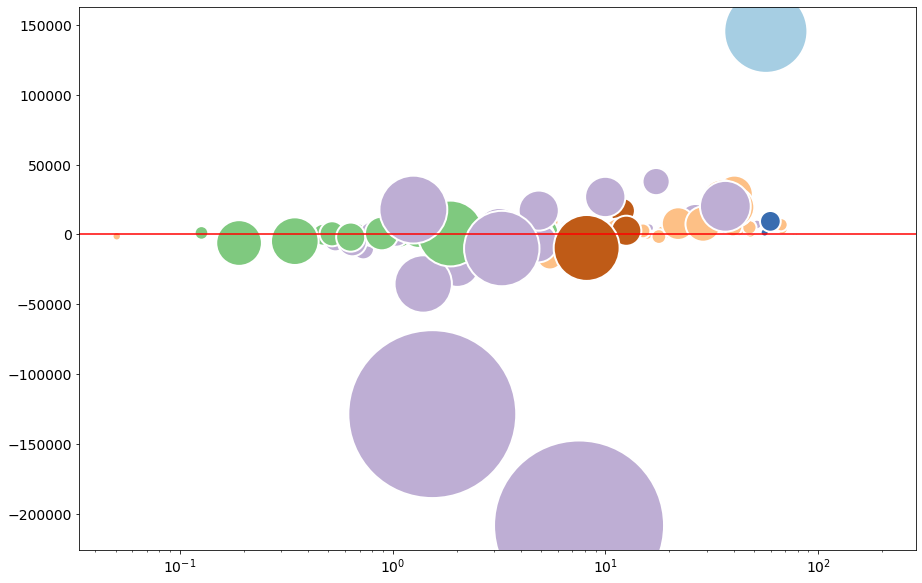

In [84]:
fig, ax = plt.subplots(figsize=(15, 10))
scatter = plt.scatter(
    y = df_final_sort_pop['net_export'], 
    x = df_final_sort_pop['final_demand']/df_final_sort_pop['population'], 
    s=df_final_sort_pop['population']/50000, 
    c=df_final_sort_pop['CONTINENT'].cat.codes, 
    cmap=ListedColormap(["#7fc97f","#beaed4","#fdc086","#a6cee3","#386cb0","#f0027f","#bf5b17"]), 
#     alpha=0.3, 
    edgecolors="white", 
    linewidth=2);

plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='Line of Zero Net Export of Deaths')
# plt.text(0.5, 0.5, 'text', fontsize=30, va='center', ha='center')

# Add titles (main and on axis)
plt.xscale('log')
# legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=continent,
#                     loc="lower right", fontsize=18)
# ax.add_artist(legend1)

# add labels to bubbles that are big enough
for i in annotation_countries:
    if i == 'RUS':
        plt.annotate(country_name[i],xy=(df_final_sort_pop[df_final_sort_pop['ADM0_A3']==i]['final_demand'].values[0]/df_final_sort_pop[df_final_sort_pop['ADM0_A3']==i]['population'].values[0],
                      (df_final_sort_pop[df_final_sort_pop['ADM0_A3']==i]['net_export'].values[0])-10000),size=17,
                    arrowprops = dict(facecolor ='black',shrink = 0.001))
    elif i == 'SAU':
        plt.annotate(country_name[i],xy=(df_final_sort_pop[df_final_sort_pop['ADM0_A3']==i]['final_demand'].values[0]/df_final_sort_pop[df_final_sort_pop['ADM0_A3']==i]['population'].values[0],
                      (df_final_sort_pop[df_final_sort_pop['ADM0_A3']==i]['net_export'].values[0])+10000),size=17,
                    arrowprops = dict(facecolor ='black',shrink = 0.001))        
    else:
        plt.annotate(country_name[i],xy=(df_final_sort_pop[df_final_sort_pop['ADM0_A3']==i]['final_demand'].values[0]/df_final_sort_pop[df_final_sort_pop['ADM0_A3']==i]['population'].values[0],
                      (df_final_sort_pop[df_final_sort_pop['ADM0_A3']==i]['net_export'].values[0])),size=17,
                    arrowprops = dict(facecolor ='black',shrink = 0.001))

plt.legend(loc="upper left",fontsize=18)

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
plt.ylabel("Net export of deaths",fontsize=24)
plt.xlabel("log(Final demand per capita(million dollars))",fontsize=24)
# plt.title("")

In [105]:
df_final.sort_values(by=['net_export'],ascending=True,inplace=True)
df_final.reset_index(drop=True,inplace=True)

In [106]:
df_final

,ADM0_A3,net_export,population,final_demand,CONTINENT,CONTINENT_code,demand_capita,net_export_capita,colors
0,CHN,-208392.649377,1.444650e+09,1.086378e+10,Asia,1,7.520006,-0.000144,#beaed4
1,IND,-128664.725327,1.409461e+09,2.166778e+09,Asia,1,1.537309,-0.000091,#beaed4
2,BGD,-35492.323210,1.643983e+08,2.291324e+08,Asia,1,1.393764,-0.000216,#beaed4
3,VNM,-21642.564217,9.895143e+07,1.995281e+08,Asia,1,2.016424,-0.000219,#beaed4
4,ROU,-15873.830018,3.314418e+07,1.818005e+08,Europe,2,5.485141,-0.000479,#fdc086
...,...,...,...,...,...,...,...,...,...
182,FRA,25715.868320,7.037750e+07,2.467953e+09,Europe,2,35.067356,0.000365,#fdc086
183,TUR,26797.883574,8.119245e+07,8.107386e+08,Asia,1,9.985394,0.000330,#beaed4
184,GBR,28888.350312,6.787015e+07,2.739458e+09,Europe,2,40.363215,0.000426,#fdc086
185,SAU,37814.674988,3.685602e+07,6.380188e+08,Asia,1,17.311116,0.001026,#beaed4


In [107]:
df_final.to_csv('country_continent.csv')

In [108]:
color_map = {'Africa':"#7fc97f",'Asia':"#beaed4",'Europe':"#fdc086",'North America':"#a6cee3",'Oceania':"#386cb0",'Seven seas (open ocean)':"#f0027f",'South America':"#bf5b17"}

In [109]:
df_final['colors']=np.nan
for i in range(len(df_final)):
    df_final.loc[i,'colors'] = color_map[df_final.loc[i,'CONTINENT']]

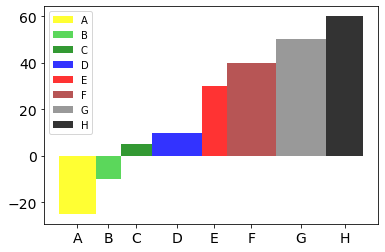

In [110]:
x = ["A","B","C","D","E","F","G","H"]

y = [-25, -10, 5, 10, 30, 40, 50, 60]

w = [30, 20, 25, 40, 20, 40, 40, 30]

colors = ["yellow","limegreen","green","blue","red","brown","grey","black"]

#plt.bar(x, height = y, width = w, color = colors, alpha = 0.8)

xticks=[]
for n, c in enumerate(w):
    xticks.append(sum(w[:n]) + w[n]/2)
    
w_new = [i/max(w) for i in w]
a = plt.bar(xticks, height = y, width = w, color = colors, alpha = 0.8)
_ = plt.xticks(xticks, x)

plt.legend(a.patches, x)

In [111]:
min(df_final['net_export']/(df_final['population']/1000))

-0.7517412424092038

In [112]:
patches = []
for i in color_map:
    patches.append(mpatches.Patch(color=color_map[i], label=i))

In [113]:
country1_list = list(df_final['ADM0_A3'])[:10]
country2_list = list(df_final['ADM0_A3'])[-10:]

In [114]:
country1_list

['CHN', 'IND', 'BGD', 'VNM', 'ROU', 'RUS', 'UKR', 'PRK', 'IDN', 'BRA']

KeyError: 'DEU'

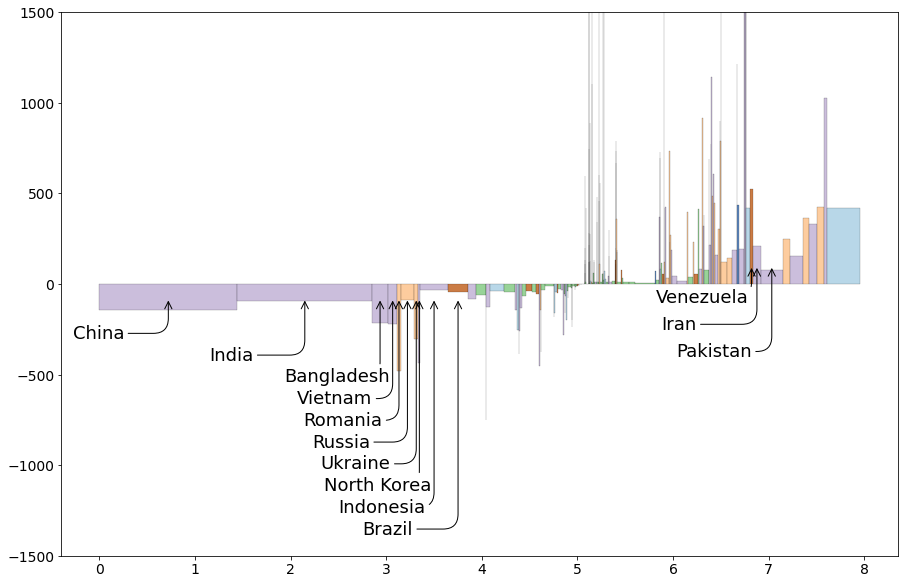

In [115]:
plt.subplots(figsize=(15, 10))

y = df_final['net_export']/(df_final['population']/1000000)

w = df_final['population']/1000000000

colors = df_final['colors']

#plt.bar(x, height = y, width = w, color = colors, alpha = 0.8)

xticks=[]
for n, c in enumerate(w):
    xticks.append(sum(w[:n]) + w[n]/2)
    
w_new = [i/max(w) for i in w]
plt.ylim(-1500,1500)
a = plt.bar(xticks, height = y, width = w, color = colors, alpha = 0.8, linewidth = 0.2, edgecolor = 'black')
# b = plt.xticks(xticks, df_final['ADM0_A3'])


arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90,\
    rad = 15")

count1 = -300
for i in country1_list:
    
    c_index = list(df_final['ADM0_A3']).index(i)
    x_loc = sum(w[:c_index]) + (w[c_index]/2)
    y_loc = -80
    plt.annotate(country_name[i],xy=(x_loc,y_loc),size=18,
        arrowprops = arrowprops,
#                  arrowprops = dict(facecolor ='black',shrink = 0.05),
        xytext =(x_loc-1,y_text_loc)
                )
    count1 -= 120
        


count2 = -100
for j in country2_list:
    c_index2 = list(df_final['ADM0_A3']).index(j)
    x_loc2 = sum(w[:c_index2]) + (w[c_index2]/2)
    y_loc2 = 100
    y_text_loc2 = count2
    plt.annotate(country_name[j],xy=(x_loc2,y_loc2),size=18,
        arrowprops = arrowprops,
#                  arrowprops = dict(facecolor ='black',shrink = 0.05),
        xytext =(x_loc2-1,y_text_loc2)
                )
    count2 -= 150

plt.xlabel("Population (billion)",fontsize=24)
plt.ylabel("Net export of deaths per million population",fontsize=24)

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.legend(handles=patches,fontsize=20)

# plt.legend(a.patches, df_final['CONTINENT'])

In [ ]:
df_final['net_export_capita'] = df_final['net_export']/df_final['population']

In [ ]:
df_final.sort_values(by='net_export')

In [116]:
negative = 0
positive = 0
for i in df_final['net_export']:
    if i >= 0:
        positive += i
    else:
        negative += i

In [117]:
negative,positive

(-543299.2683406809, 594906.6436808733)

In [118]:
196.953734/(6.383400e+03/1000000)

30854.048626124008

In [119]:
for continent in list(df_final['CONTINENT'].unique()):
    df_continent = df_final[df_final['CONTINENT'] == continent]
    total_number = len(df_continent)
    negative = len(df_continent[df_continent['net_export'] <= 0])
    positive = len(df_continent[df_continent['net_export'] > 0])
    print(continent,'negative',negative/total_number,'positive',positive/total_number)

Asia negative 0.3469387755102041 positive 0.6530612244897959
Europe negative 0.20930232558139536 positive 0.7906976744186046
South America negative 0.4166666666666667 positive 0.5833333333333334
Africa negative 0.4489795918367347 positive 0.5510204081632653
North America negative 0.2608695652173913 positive 0.7391304347826086
Oceania negative 0.0 positive 1.0
Seven seas (open ocean) negative 0.0 positive 1.0
